# Resize images

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

# Build the compute_difference()

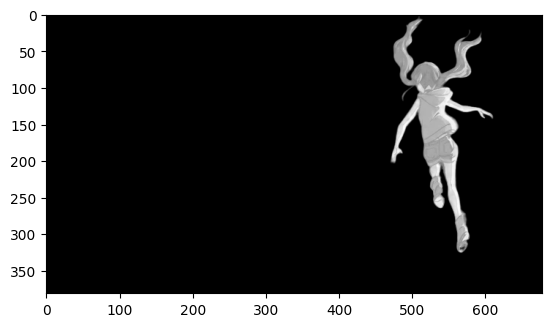

In [28]:
def compute_difference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

difference_single_channel = compute_difference(bg1_image, ob_image)
plt.imshow(difference_single_channel, cmap='gray')


# Build the compute_binary_mask()

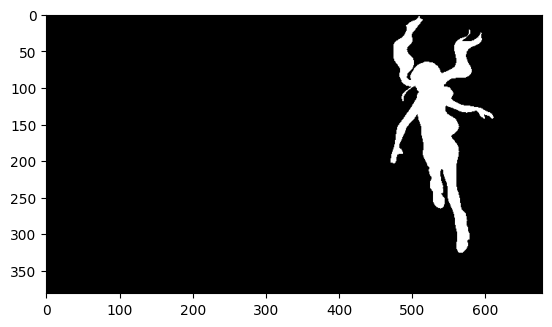

In [29]:
def compute_binary_mask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

binary_mask = compute_binary_mask(difference_single_channel)
plt.imshow(binary_mask, cmap='gray')

# Build the replace_background()

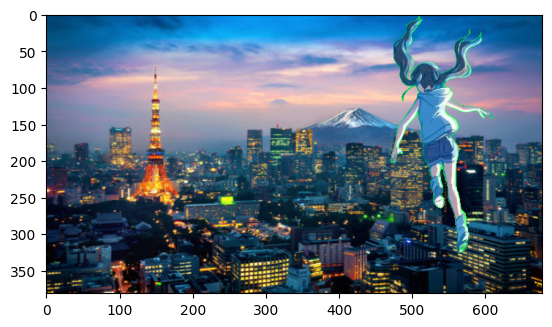

In [30]:
def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask == 255, ob_image, bg2_image)
    return output

output = replace_background(bg1_image, bg2_image, ob_image)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
